In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load AI-enhanced dataset
df = pd.read_csv("../notebooks/llm_summaries_output.csv")

# Preview structure
df.head()

ticker  prev_close    open  gap_pct                   timestamp    rsi  \
0   NVDA      157.25  158.37     0.71  2025-07-05T10:15:47.000464  70.98   
1   TSLA      315.65  317.99     0.74  2025-07-05T10:15:47.142641  48.41   
2   AAPL      212.44  212.15    -0.14  2025-07-05T10:15:47.285250  74.80   
3    AMD      138.52  139.11     0.43  2025-07-05T10:15:47.374825  73.48   
4   MSFT      491.09  493.81     0.55  2025-07-05T10:15:47.576358  69.45   

   rel_volume  dist_from_5d_high  dist_from_5d_low  \
0        0.73              -1.02              5.18   
1        0.59              -4.25              7.55   
2        0.50              -0.51              7.17   
3        0.63              -6.66              2.06   
4        0.62              -0.38              2.07   

                                         llm_summary  
0  1. Technically, NVDA is showing mixed signals ...  
1  1. Technically, Tesla (TSLA) is showing a slig...  
2  1. Technically, AAPL is showing mixed signals....  
3  1. Technically, AMD is showing a slight bullis...  
4  1. Technically, Microsoft (MSFT) has a slight ...

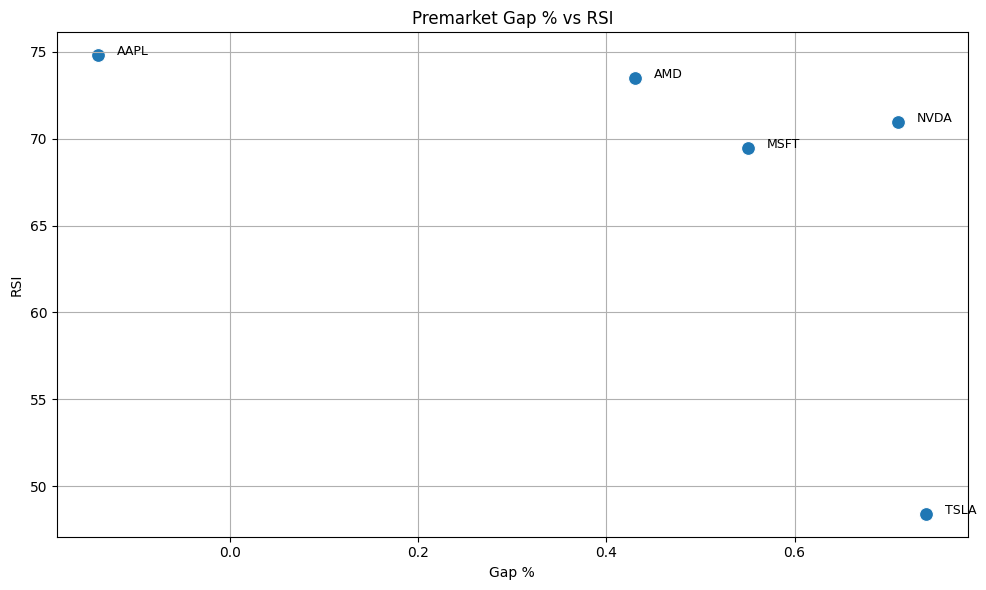

In [3]:
#  Visualize how much each stock is gapping up/down (Gap %) vs. technical momentum (RSI)
# - Gap % on X-axis: how much the stock moved from yesterday’s close to today’s open
# - RSI on Y-axis: momentum indicator showing whether the stock is overbought (>70) or oversold (<30)
# - This scatter plot helps identify:
#     • Momentum breakouts (high gap %, high RSI)
#     • Potential reversals (high gap %, low RSI)
#     • Hidden divergences or quiet setups

# Plot Gap % vs RSI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="gap_pct", y="rsi", s=100)

# Annotate tickers
for _, row in df.iterrows():
    plt.text(row["gap_pct"] + 0.02, row["rsi"], row["ticker"], fontsize=9)

plt.title("Premarket Gap % vs RSI")
plt.xlabel("Gap %")
plt.ylabel("RSI")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_24626/3306312962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="ticker", y="rel_volume", palette="crest")


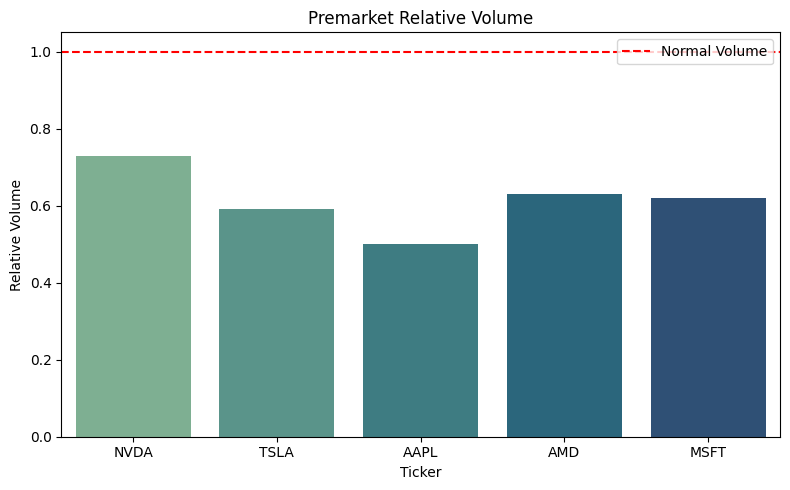

In [4]:
# Show which stocks have unusually high volume this morning (i.e., which ones are “in play”).

# Barplot: Relative Volume by Ticker
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="ticker", y="rel_volume", palette="crest")
plt.title("Premarket Relative Volume")
plt.ylabel("Relative Volume")
plt.xlabel("Ticker")
plt.axhline(1.0, color="red", linestyle="--", label="Normal Volume")
plt.legend()
plt.tight_layout()
plt.show()

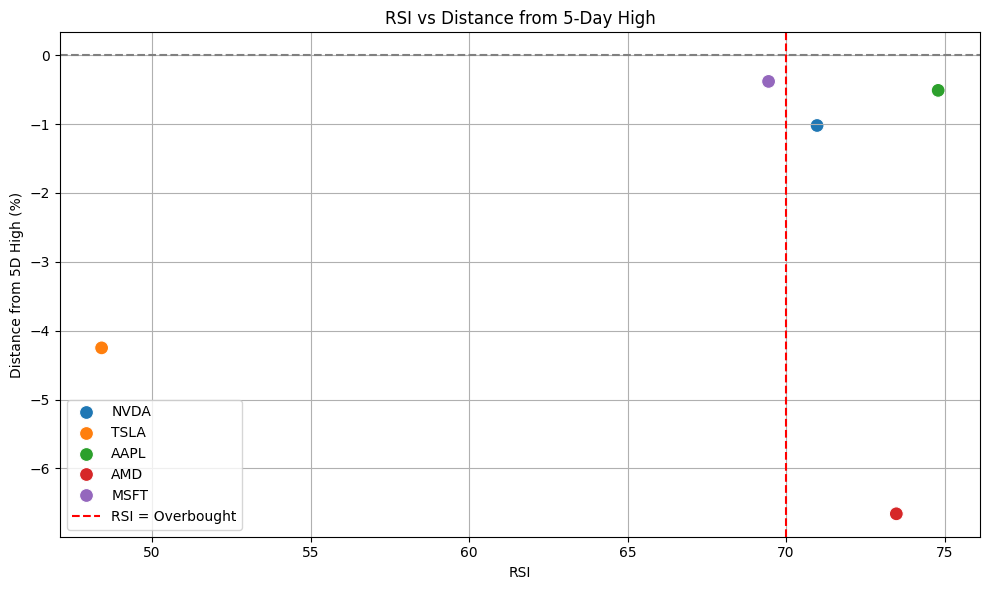

In [6]:
# Reveals how “overbought” a stock is and how close it is to recent highs.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="rsi", y="dist_from_5d_high", hue="ticker", s=100)

plt.axhline(0, color="gray", linestyle="--")
plt.axvline(70, color="red", linestyle="--", label="RSI = Overbought")

plt.title("RSI vs Distance from 5-Day High")
plt.xlabel("RSI")
plt.ylabel("Distance from 5D High (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()